In [14]:
import numpy
from scipy.linalg import solve

In [15]:
def constructMatrix(nx, ny, sigma):
    A = numpy.zeros(((nx-2)*(ny-2), (nx-2)*(ny-2)))
    
    row_number = 0
    for j in range(1, ny-1):
        for i in range(1, nx-1):
            
            if i==1 and j==1:
                A[row_number,row_number] = 1/sigma + 4
                A[row_number,row_number+1] = -1
                A[row_number,row_number+nx-2] = -1
            
            elif i==nx-2 and j==1:
                A[row_number,row_number] = 1/sigma + 3
                A[row_number,row_number-1] = -1
                A[row_number,row_number+nx-2] = -1
                
            elif i==1 and j==ny-2:
                A[row_number,row_number] = 1/sigma + 3
                A[row_number,row_number+1] = -1
                A[row_number,row_number-(nx-2)] = -1
                
            elif i==nx-2 and j==ny-2:
                A[row_number,row_number] = 1/sigma + 2
                A[row_number,row_number-1] = -1
                A[row_number,row_number-(nx-2)] = -1
                
            elif i==1:
                A[row_number,row_number] = 1/sigma + 4
                A[row_number,row_number+1] = -1
                A[row_number,row_number+nx+2] = -1
                A[row_number,row_number-(nx-2)] = -1
                
            elif i==nx-2:
                A[row_number,row_number] = 1/sigma + 3
                A[row_number,row_number-1] = -1
                A[row_number,row_number+nx-2] = -1
                A[row_number,row_number-(nx-2)] = -1
                
            elif j==1:
                A[row_number,row_number]=1/sigma + 4
                A[row_number,row_number+1] = -1
                A[row_number,row_number-1] = -1
                A[row_number,row_number+nx-2] = -1
                
            elif j==ny-2:
                A[row_number,row_number] = 1/sigma + 3
                A[row_number,row_number+1] = -1
                A[row_number,row_number-1] = -1
                A[row_number,row_number-(nx-2)] = -1
                
            else:
                A[row_number,row_number] = 1/sigma + 4
                A[row_number,row_number+1] = -1
                A[row_number,row_number-1] = -1
                A[row_number,row_number+nx-2] = -1
                A[row_number,row_number-(nx-2)] = -1
                
            row_number += 1
            
    return A

In [16]:
def generateRHS(nx, ny, sigma, T, T_bc):
    
    RHS = numpy.zeros((nx-2)*(ny-2))
    
    row_number = 0
    for j in range(1,nx-1):
        for i in range(1,nx-1):
            if i==1 and j==1:
                RHS[row_number] = T[j,i]*1/sigma + 2*T_bc
            
            elif i==nx-2 and j==1:
                RHS[row_number] = T[j,i]*1/sigma + T_bc
            
            elif i==1 and j==ny-2:
                RHS[row_number] = T[j,i]*1/sigma + T_bc
            
            elif i==nx-2 and j==ny-2:
                RHS[row_number] = T[j,i]*1/sigma
            
            elif i==1:
                RHS[row_number] = T[j,i]*1/sigma + T_bc
            
            elif i==nx-2:
                RHS[row_number] = T[j,i]*1/sigma
            
            elif j==1:
                RHS[row_number] = T[j,i]*1/sigma + T_bc
            
            elif j==ny-2:
                RHS[row_number] = T[j,i]*1/sigma
            
            else:
                RHS[row_number] = T[j,i]*1/sigma
            
            row_number += 1
        
    return RHS

In [17]:
def map_1Dto2D(nx, ny, T_1D, T_bc):
    
    T = numpy.zeros((ny,nx))
    
    row_number = 0
    for j in range(1,ny-1):
        for i in range(1,nx-1):
            T[j,i] = T_1D[row_number]
            row_number += 1
            
    T[0,:] = T_bc
    T[:,0] = T_bc
    
    T[-1,:] = T[-2,:]
    T[:,-1] = T[:,-2]
    
    return T

In [18]:
def btcs_2D(T, A, nt, sigma, T_bc, nx, ny, dt):
    
    j_mid = int((numpy.shape(T)[0])/2)
    i_mid = int((numpy.shape(T)[1])/2)
    
    for t in range(nt):
        Tn = T.copy()
        b = generateRHS(nx, ny, sigma, Tn, T_bc)
        
        T_interior = solve(A,b)
        T = map_1Dto2D(nx, ny, T_interior, T_bc)
        
        if T[j_mid, i_mid] >= 70:
            print ("Center of plate reached 70C at time {0:.2f}s, in time step {1:d}.".format(dt*t, t))
            break
            
    if T[j_mid, i_mid]<70:
        print ("Center has not reached 70C yet, it is only {0:.2f}C.".format(T[j_mid, i_mid]))
        
    return T

In [19]:
alpha = 1e-4

L = 1.0e-2
H = 1.0e-2

nx = 21
ny = 21
nt = 300

dx = L/(nx-1)
dy = H/(ny-1)

x = numpy.linspace(0,L,nx)
y = numpy.linspace(0,H,ny)

T_bc = 100

Ti = numpy.ones((ny, nx))*20
Ti[0,:]= T_bc
Ti[:,0] = T_bc

In [20]:
sigma = 0.25
A = constructMatrix(nx, ny, sigma)

In [21]:
dt = sigma * numpy.min(dx, dy)**2 / alpha
T = btcs_2D(Ti.copy(), A, nt, sigma, T_bc, nx, ny, dt)

Center has not reached 70C yet, it is only 68.95C.


In [22]:
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

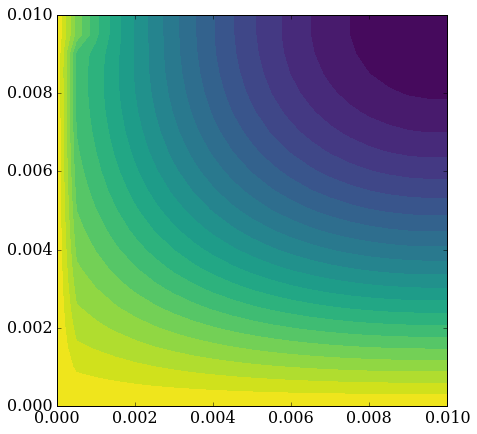

In [23]:
pyplot.figure(figsize=(7,7))
pyplot.contourf(x,y,T,20, cmap=cm.viridis);